In [11]:
import wordcloud
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


In [71]:
df = pd.read_pickle('./cache/tokens.pkl')
df_anew = pd.read_csv('../lexicon/ANEW2017/ANEW2017All.txt',sep='\t')
lexicon_words = df_anew.Word.to_list()

In [72]:
df.head()

,Party,Handle,Tweet,lang,lang_prob,tokens,hashtags,mentions,rt
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",en,0.843735,"[dems, vote, proud, support, similar, legislat...","#SaveTheInternet,#NetNeutrality",NaN,NaN
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,en,0.828348,"[resident, teacher, several, recognized, teach...",NaN,@RepDarrenSoto,@WinterHavenSun
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,en,0.972683,"[noted, left, approximately, 90, billion, dama...",NaN,@RepDarrenSoto,@NBCLatino
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,en,0.766093,"[thanks, taking, time, meet, ed, marucci, guzman]",#NALCABPolicy2018,"@RepDarrenSoto,@LatinoLeader",@NALCABPolicy
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,en,0.746217,"[season, starts, ’, readiness, well, 🤦🏼‍♂️😡😩@p...",NaN,"@RepDarrenSoto,@EspaillatNY",@Vegalteno


In [28]:
df_r = df[df.Party=='Republican']
df_d = df[df.Party=='Democrat']

In [49]:
tokens_r = []
for tks in df_r.tokens:
    tokens_r.extend(tks)

tokens_r_lex = list(set(tokens_r).intersection(set(lexicon_words)))

tokens_d = []
for tks in df_d.tokens:
    tokens_d.extend(tks)

tokens_d_lex = list(set(tokens_d).intersection(set(lexicon_words)))


In [91]:
hashtag_r = []
for tks in df_r.hashtags.dropna().tolist():
    hashtag_r.extend(tks.split(','))

hashtag_d = []
for tks in df_d.hashtags.dropna().tolist():
    hashtag_d.extend(tks.split(','))

print(len(hashtag_r), len(hashtag_d))

17316 19090


In [93]:
def plot_word_cloud(tokens_list):
    return  WordCloud(
        width=400, height=800,
        background_color='white',
        mode='RGB', 
        max_words=100,
        collocations=False,
        # stopwords=STOPWORDS.add('amp'),
        max_font_size=50,
        random_state=50, 
        ).generate(" ".join(tokens_list))

In [66]:
wc_r = plot_word_cloud(tokens_r)
wc_r_lex = plot_word_cloud(tokens_r_lex)

In [67]:
wc_d = plot_word_cloud(tokens_d)
wc_d_lex = plot_word_cloud(tokens_d_lex)

Text(0.5, 1.0, 'Democrat')

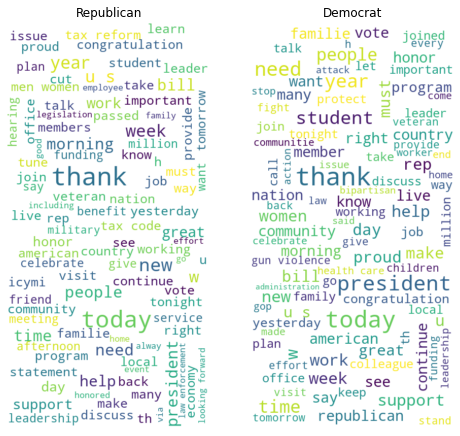

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.ravel()

axs[0].imshow(wc_r, interpolation="bilinear")
axs[0].axis('off')
axs[0].set_title('Republican')
axs[1].imshow(wc_d, interpolation="bilinear")
axs[1].axis('off')
axs[1].set_title('Democrat')


Text(0.5, 1.0, 'Democrat')

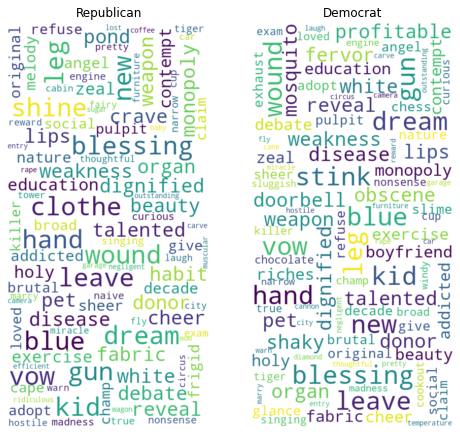

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.ravel()

axs[0].imshow(wc_r_lex, interpolation="bilinear")
axs[0].axis('off')
axs[0].set_title('Republican')
axs[1].imshow(wc_d_lex, interpolation="bilinear")
axs[1].axis('off')
axs[1].set_title('Democrat')

Text(0.5, 1.0, 'Democrat')

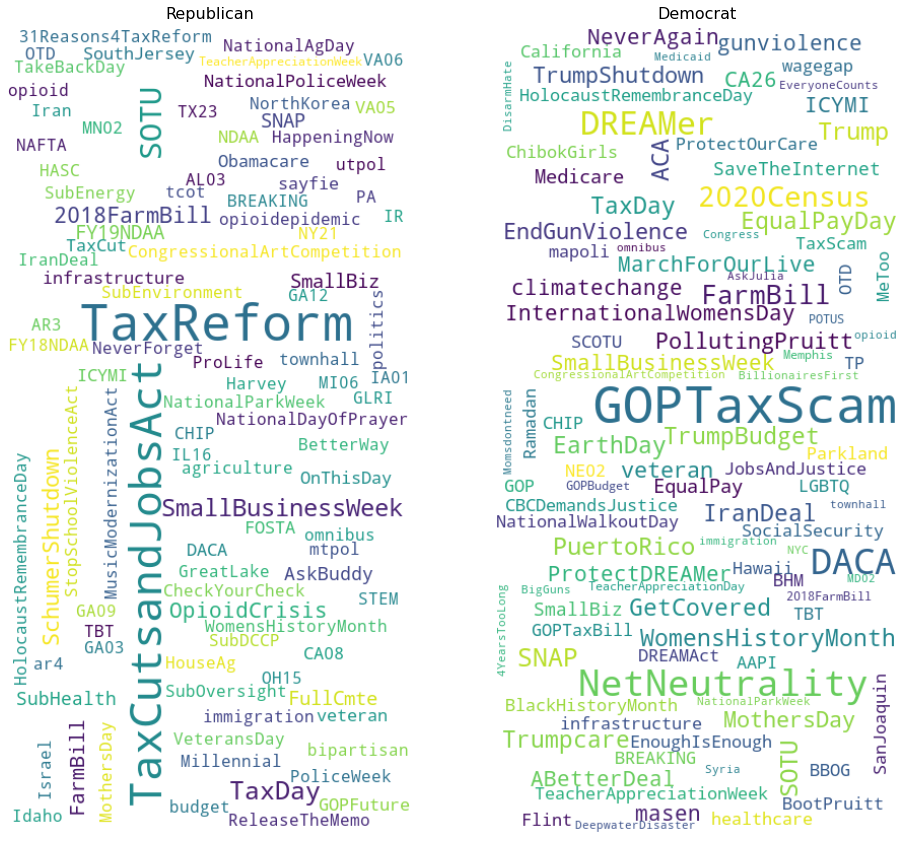

In [94]:
wc_hashtag_r = plot_word_cloud(hashtag_r)
wc_hashtag_d = plot_word_cloud(hashtag_d)

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs = axs.ravel()

axs[0].imshow(wc_hashtag_r, interpolation="bilinear")
axs[0].axis('off')
axs[0].set_title('Republican', fontsize=16)
axs[1].imshow(wc_hashtag_d, interpolation="bilinear")
axs[1].axis('off')
axs[1].set_title('Democrat', fontsize=16)